## Import important functiosn for calculation and plotting

In [19]:
## for slider widget and interactive drawing
from ipywidgets import interactive
## for plotting on notebook
import matplotlib.pyplot as plt
## numpy for numerical calculations
import numpy as np
## numerical integration of arbitrary functions
from scipy.integrate import quad

## Define functions

In [20]:
## define the Woods-Saxon potential with parameters 
## R mean radius, a diffuseness
## 1j is for complex
## q is the momentum transfer
def WoodsSaxon(r, a, R):
    return 1/(1+np.exp((r-R)/a))

def Integrand(r, a, R, q):
    return 1/(1+np.exp((r-R)/a))*np.exp(1j*r*q)

## Calculate rho(r) and F(q) for a range of radii

In [21]:
## radius 0 - 5 fm
r = np.linspace(0,5,201)
## momentum space
q = np.linspace(0,5,201)

## function to calculate the form factor
def Calculate(a,R,r,q):
   ## radial density distribution
    rho = WoodsSaxon(r,a,R)

    F = []
    ## loop over momentum transfers and numerically integrate
    for qq in q:
        res = quad(Integrand, 0, 100, args=(a,R,qq));
        z = res[0]+1j*res[1]
        F.append(abs(z)) 
    
    return rho, F

In [22]:
## change here the parameters of the potential
a = 0.3
R = 2

rho, F = Calculate(a,R,r,q);


/usr/lib/python3/dist-packages/scipy/integrate/_quadpack_py.py:463: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


## Interactive plot: Form factor as function of momentum transfer q

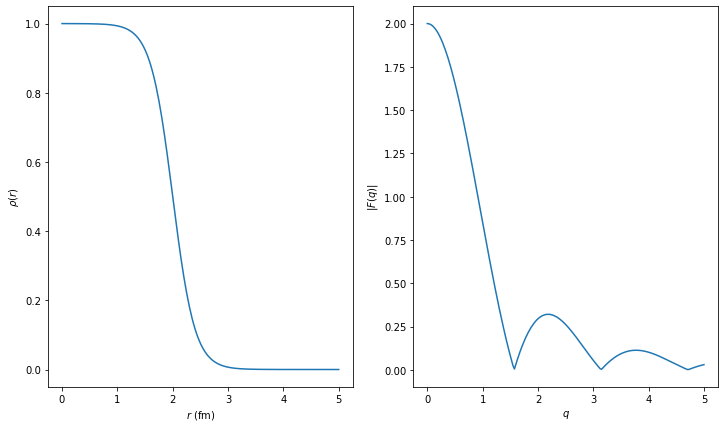

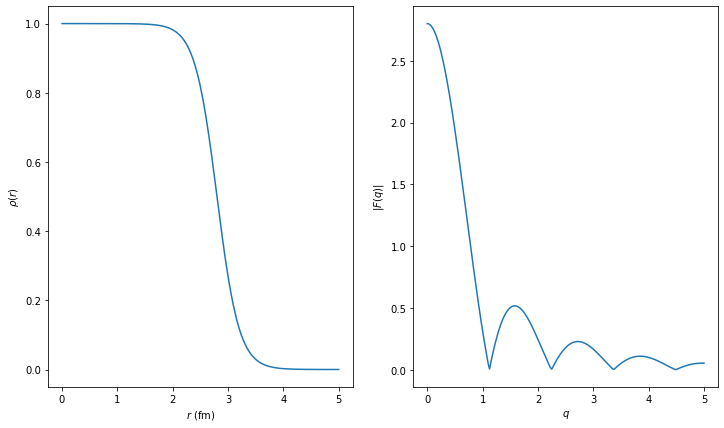

In [23]:
def update(R = 2, a = 0.2):
    fig = plt.figure(figsize=(12,7))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    rho, F = Calculate(a,R,r,q);
    ax1.plot(r,rho)
    ax2.plot(q,F)
    ax1.set_xlabel(r"$r$ (fm)")
    ax1.set_ylabel(r"$\rho(r)$")
    ax2.set_xlabel(r"$q$")
    ax2.set_ylabel(r"$|F(q)|$")
    
plot = interactive(update, R = (0,5,0.1), a = (0.1,1,0.05));
plot